In [1]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 4.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import spacy

In [3]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver import ActionChains

from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC

from tqdm import tqdm

import pandas as pd

In [4]:
import string
import numpy as np

pun = string.punctuation+"¿¡"
pun

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~¿¡'

In [5]:
def text_prep(text: str) -> str:
    return text.replace('<br />', ' ')

In [6]:
def remove_punctuation(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', string.punctuation))

In [7]:
def configure_driver():
    # Add additional Options to the webdriver
    options = webdriver.ChromeOptions()
    # add the argument and make the browser Headless.
    # options.add_argument('--headless')
    # options.add_argument('--no-sandbox') # only colab
    # options.add_argument('--disable-dev-shm-usage') # only colab
    # Handle the service
    # service = Service(executable_path=r'/usr/bin/chromedriver')
    # Instantiate the Webdriver: Mention the executable path of the webdriver you have downloaded
    driver = webdriver.Chrome(options=options)

    #driver = webdriver.Firefox()
    return driver

In [8]:
def getText(driver, total_clicks, url):
    # https://www.pluralsight.com/search?q=web%20scraping&categories=course
    # Step 1: Go to pluralsight.com, category section with selected search keyword
    # driver.get("https://www.pluralsight.com/search?q={search_keyword}&categories=course")
    # driver.get("https://booknet.com/es/reader/una-pequena-promesa-b425858")
    # driver.get("https://booknet.com/es/reader/un-amor-para-april-b425666")
    # driver.get("https://www.allfreenovel.com/Page/Story/88872/page-1-of-Picked-by-the-Billionaire--Covington-Billionaires-/1/154")
    driver.get(url)

    timeout = 3
    count = 0
    loop_obj = tqdm(range(total_clicks))

    data = []
    for k in loop_obj:
        # loop_obj.set_description(f"Epoch: {k + 1}")
        loop_obj.set_postfix_str(f"Count error: {count}")

        # wait for the element to load
        try:
            WebDriverWait(driver, timeout*10).until(lambda s: s.find_element(By.CLASS_NAME, "pg-boilerplate").is_displayed())
        except TimeoutException:
            print("Timeout :(")
            return None
        
        # Step 2: Create a parse tree of page sources after searching
        soup = BeautifulSoup(driver.page_source, "lxml")

        # Step 3: Iterate over the search result and fetch the course
        # content = soup.select("div.px-2 div.my-2 div div")

        content = soup.find_all('p')
        # print(content)

        for text in content:
            data.append(text.get_text())
    return data

### Web scrapping

In [9]:
total_clicks = 1
# create the driver object.
driver = configure_driver()
data = getText(driver, total_clicks, "https://www.gutenberg.org/cache/epub/71725/pg71725-images.html")

100%|██████████| 1/1 [00:00<00:00, 12.28it/s, Count error: 0]


In [10]:
data

['Title: A Summer journey in the West',
 'Author: Mrs. Eliza R. Steele',
 'Release date: September 25, 2023 [eBook #71725]',
 'Language: English',
 'Original publication: NYC: John. S. Taylor, and Co, 1841',
 'Credits: Chuck Greif and the Online Distributed Proofreading Team at https://www.pgdp.net (This file was produced from images generously made available by The Internet Archive)',
 '\nLETTER I.,\n II.,\n III.,\n IV.,\n V.,\n VI.,\n VII.,\n VIII.,\n IX.,\n X.,\n XI.\nNumerous typographical errors\nhave been corrected.—Etext transcriber.\n',
 'A SUMMER JOURNEY IN THE WEST.',
 '\nBY\n\nMrs. STEELE.\n\n\n\n\n\nNEW-YORK.\n\nPUBLISHED BY JOHN S. TAYLOR,\n\n145 Nassau Street.\n',
 'BY MRS. STEELE,\nAUTHOR OF HEROINES OF SACRED HISTORY.',
 '\nNEW YORK:\n JOHN S. TAYLOR, AND CO.\n (Brick Church Chapel, 145 Nassau-St.)\n1841.\n\nEntered according to the Act of Congress, in the year 1841, by JOHN S.\nTAYLOR & CO. in the Clerk’s Office of the District Court for the\nSouthern District of New Y

In [11]:
# close the driver.
driver.close()

In [12]:
# clean data
data_filter = [remove_punctuation(sentence.replace("\n", "")) for sentence in data]
data_filter

['Title A Summer journey in the West',
 'Author Mrs Eliza R Steele',
 'Release date September 25 2023 eBook 71725',
 'Language English',
 'Original publication NYC John S Taylor and Co 1841',
 'Credits Chuck Greif and the Online Distributed Proofreading Team at httpswwwpgdpnet This file was produced from images generously made available by The Internet Archive',
 'LETTER I II III IV V VI VII VIII IX X XINumerous typographical errorshave been corrected—Etext transcriber',
 'A SUMMER JOURNEY IN THE WEST',
 'BYMrs STEELENEWYORKPUBLISHED BY JOHN S TAYLOR145 Nassau Street',
 'BY MRS STEELEAUTHOR OF HEROINES OF SACRED HISTORY',
 'NEW YORK JOHN S TAYLOR AND CO Brick Church Chapel 145 NassauSt1841Entered according to the Act of Congress in the year 1841 by JOHN STAYLOR  CO in the Clerk’s Office of the District Court for theSouthern District of New York',
 'This little book assumes to be nothing more than a note book of all thatpassed before the observation of the author during a summer tour of

In [13]:
# save the file
file = open("book_summer.txt", "w")
for line in tqdm(data_filter):
    file.write("{} ".format(line))
file.close()

100%|██████████| 252/252 [00:00<00:00, 192455.32it/s]


In [14]:
file = open("book_summer.txt")
book = file.read()

In [15]:
nlp = spacy.load("en_core_web_md")

In [16]:
doc = nlp(book)

In [17]:
type(doc)

spacy.tokens.doc.Doc

In [18]:
print([token for token in doc])

[Title, A, Summer, journey, in, the, West, Author, Mrs, Eliza, R, Steele, Release, date, September, 25, 2023, eBook, 71725, Language, English, Original, publication, NYC, John, S, Taylor, and, Co, 1841, Credits, Chuck, Greif, and, the, Online, Distributed, Proofreading, Team, at, httpswwwpgdpnet, This, file, was, produced, from, images, generously, made, available, by, The, Internet, Archive, LETTER, I, II, III, IV, V, VI, VII, VIII, IX, X, XINumerous, typographical, errorshave, been, corrected, —, Etext, transcriber, A, SUMMER, JOURNEY, IN, THE, WEST, BYMrs, STEELENEWYORKPUBLISHED, BY, JOHN, S, TAYLOR145, Nassau, Street, BY, MRS, STEELEAUTHOR, OF, HEROINES, OF, SACRED, HISTORY, NEW, YORK, JOHN, S, TAYLOR, AND, CO, Brick, Church, Chapel, 145, NassauSt1841Entered, according, to, the, Act, of, Congress, in, the, year, 1841, by, JOHN, STAYLOR,  , CO, in, the, Clerk, ’s, Office, of, the, District, Court, for, theSouthern, District, of, New, York, This, little, book, assumes, to, be, nothin

In [19]:
print([token.lemma_ for token in doc])

['title', 'a', 'Summer', 'journey', 'in', 'the', 'West', 'Author', 'Mrs', 'Eliza', 'R', 'Steele', 'Release', 'date', 'September', '25', '2023', 'eBook', '71725', 'Language', 'English', 'original', 'publication', 'NYC', 'John', 'S', 'Taylor', 'and', 'Co', '1841', 'credit', 'Chuck', 'Greif', 'and', 'the', 'Online', 'Distributed', 'Proofreading', 'Team', 'at', 'httpswwwpgdpnet', 'this', 'file', 'be', 'produce', 'from', 'image', 'generously', 'make', 'available', 'by', 'the', 'internet', 'Archive', 'letter', 'I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XINumerous', 'typographical', 'errorshave', 'be', 'correct', '—', 'Etext', 'transcriber', 'a', 'SUMMER', 'journey', 'in', 'the', 'WEST', 'BYMrs', 'STEELENEWYORKPUBLISHED', 'BY', 'JOHN', 'S', 'taylor145', 'Nassau', 'Street', 'by', 'MRS', 'STEELEAUTHOR', 'of', 'HEROINES', 'of', 'sacred', 'history', 'NEW', 'YORK', 'JOHN', 'S', 'TAYLOR', 'and', 'CO', 'Brick', 'Church', 'Chapel', '145', 'NassauSt1841Entered', 'accord', 'to', 'the

In [20]:
data = []
columns = ["text", "lemma", "pos", "tag", "dep", "shape", "is_alpha", "is_stop"]
for token in doc:
    data.append([token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop])

df_doc = pd.DataFrame(data, columns=columns)
df_doc.head(10)

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop
0,Title,title,NOUN,NN,compound,Xxxxx,True,False
1,A,a,DET,DT,det,X,True,True
2,Summer,Summer,PROPN,NNP,compound,Xxxxx,True,False
3,journey,journey,NOUN,NN,ROOT,xxxx,True,False
4,in,in,ADP,IN,prep,xx,True,True
5,the,the,DET,DT,det,xxx,True,True
6,West,West,PROPN,NNP,compound,Xxxx,True,False
7,Author,Author,PROPN,NNP,pobj,Xxxxx,True,False
8,Mrs,Mrs,PROPN,NNP,compound,Xxx,True,False
9,Eliza,Eliza,PROPN,NNP,compound,Xxxxx,True,False


### Results

Apply POS-tagging to your texts and get the distribution of word types in your collection. What types are the most common?

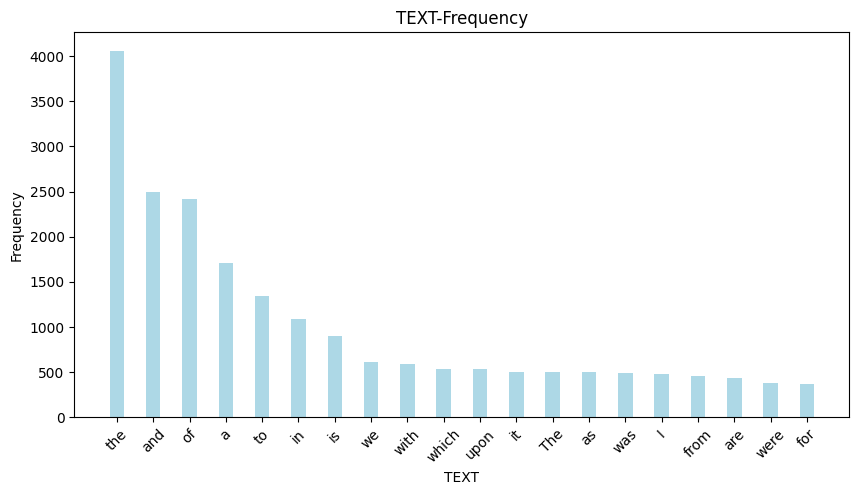

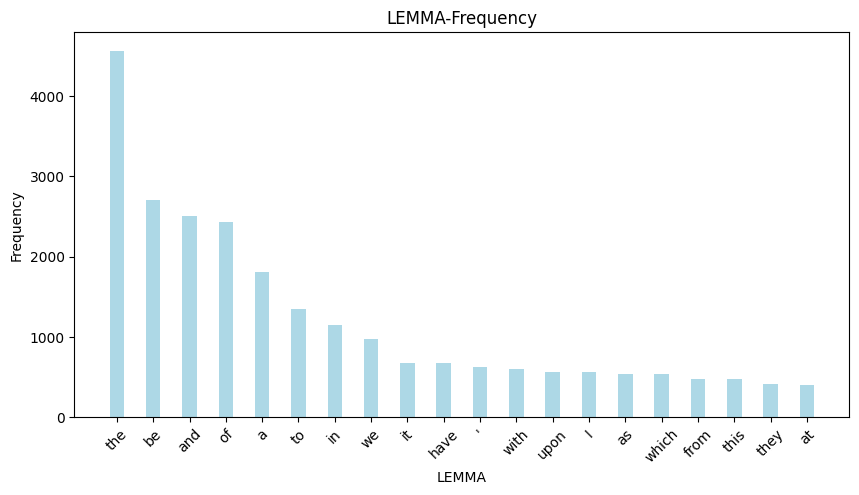

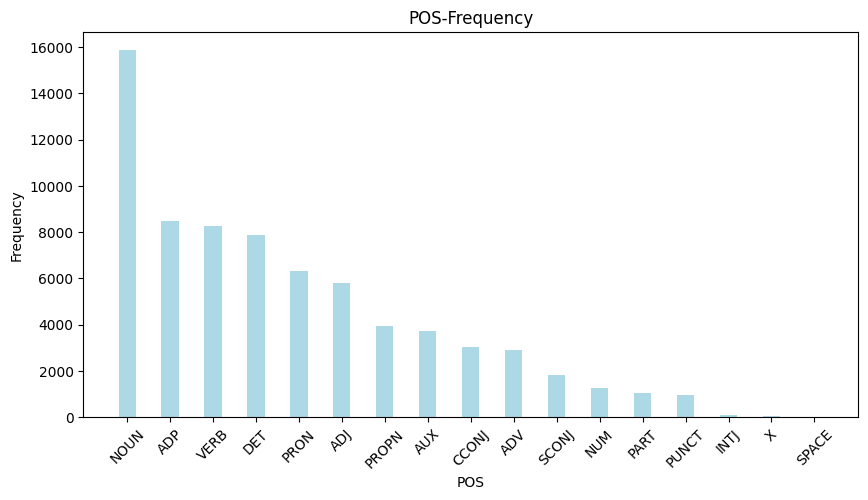

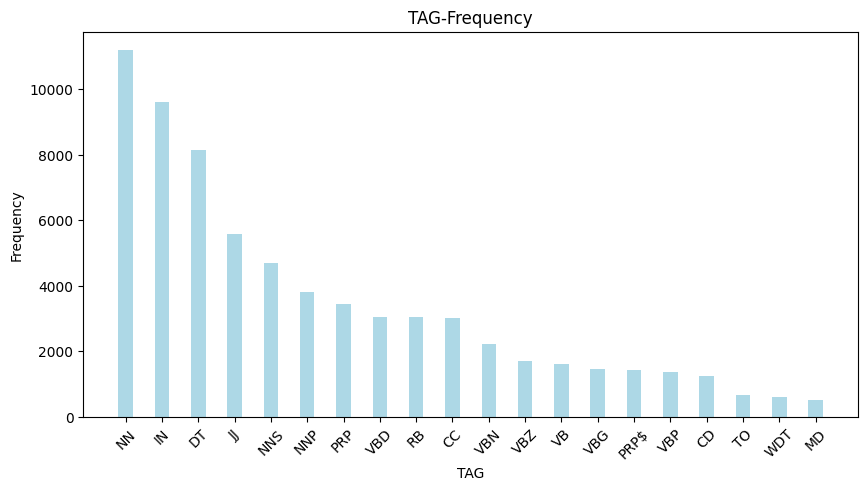

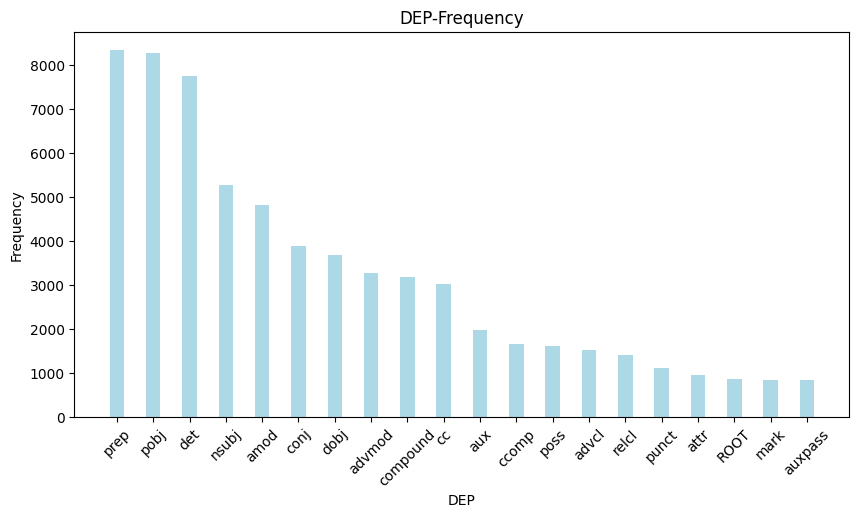

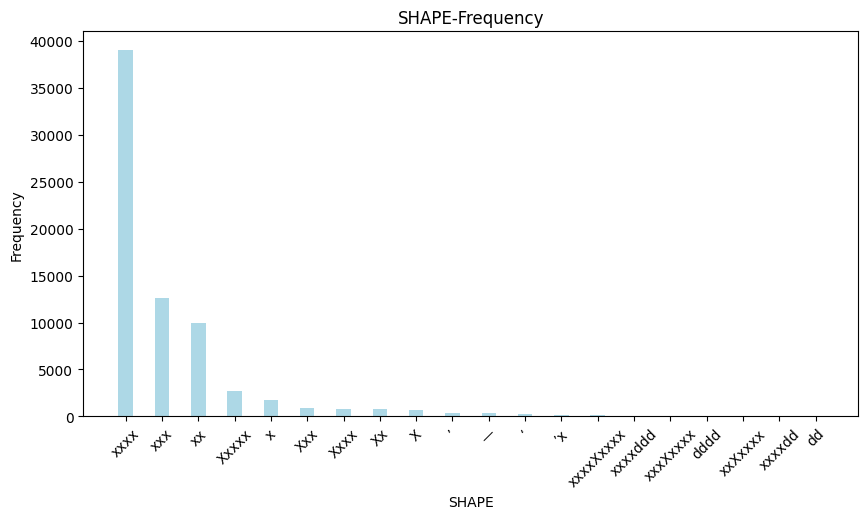

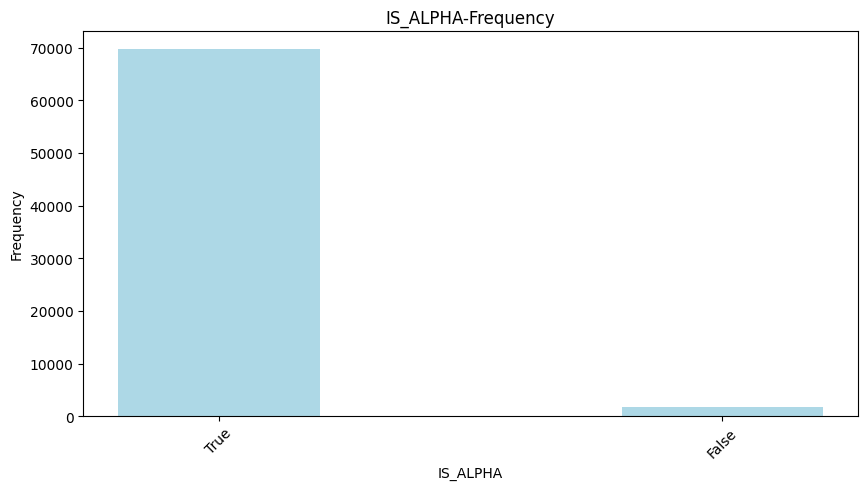

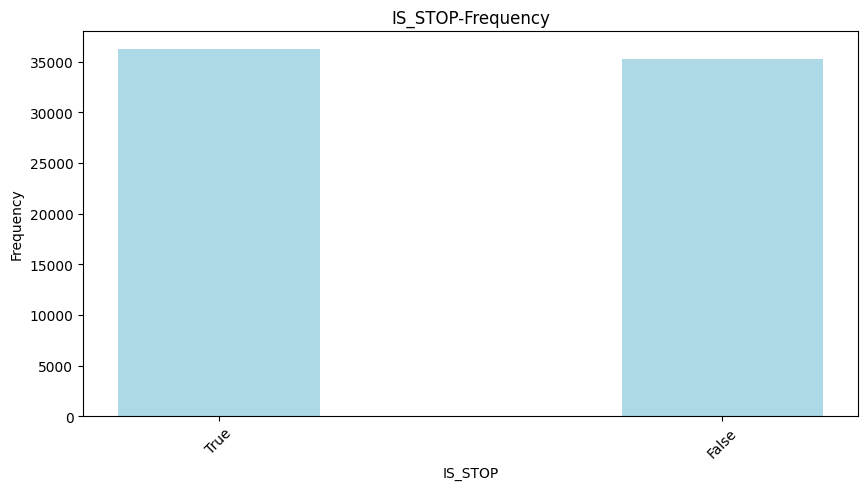

In [23]:
for col in columns:
    df_pos = df_doc[col].value_counts().to_frame().iloc[:20] # change 20
    df_pos

    # plot
    pos = list(map(str, list(df_pos.index)))
    values = df_pos["count"].values
    
    fig = plt.figure(figsize=(10, 5))
    
    # creating the bar plot
    plt.bar(pos, values, color='lightblue', width=0.4)

    plt.xticks(rotation=45)
    plt.xlabel(col.upper())
    plt.ylabel("Frequency")
    plt.title(col.upper() + "-Frequency")
    plt.show()